<a href="https://colab.research.google.com/github/mkjubran/ENEE4103/blob/master/DigitalModulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Modulation Techniques)

This experiment covers the following topics:
1. Amplitude Shift-Keying (ASK)
2. Frequency Shift-Keying (FSK)
3. Binary Phase Shift-Keying (BPSK)

Import necessary libraries

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

#ASK

SNR = 10.922312dB
bit period = 0.0200
bit errors = 0
bits transmitted = 640
bit error percent = 0.00%


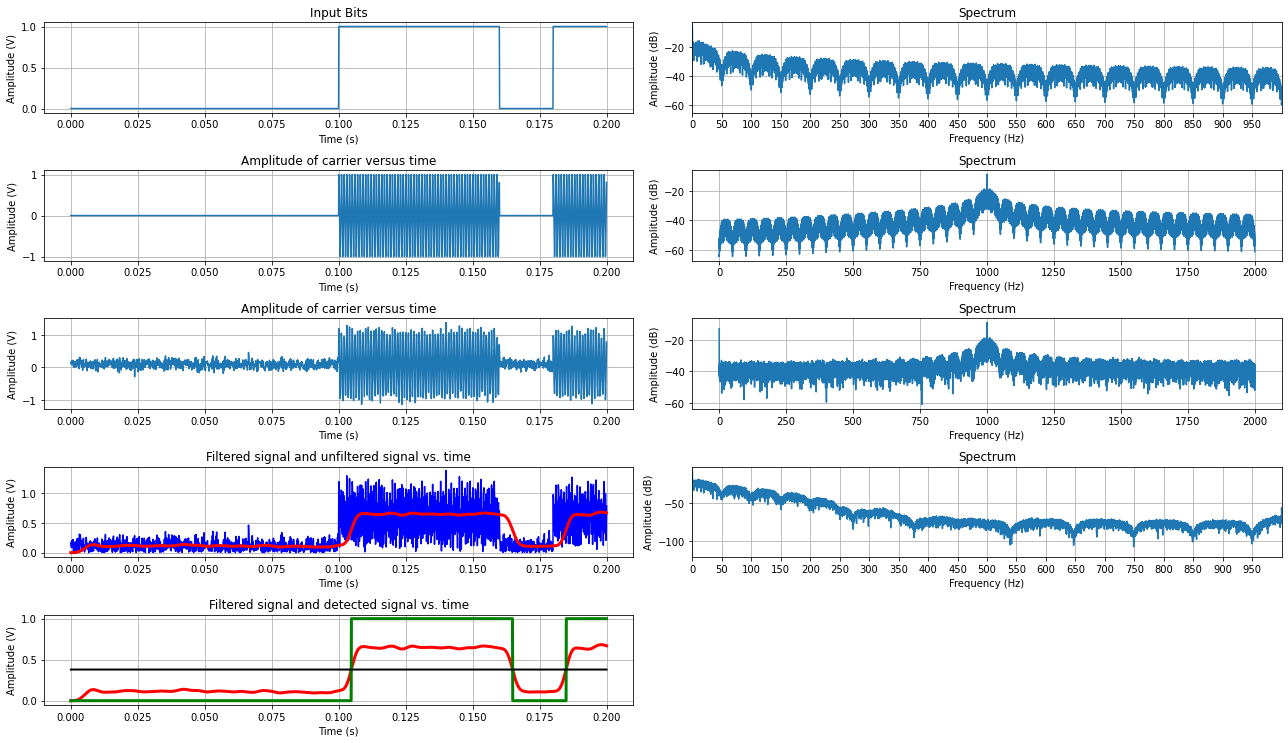

In [299]:
import numpy as np
import pylab as pl
import scipy.signal.signaltools as sigtool
import scipy.signal as signal
from numpy.random import sample

#the following variables setup the system
Fc = 1000       #simulate a carrier frequency of 1kHz
Fbit = 50       #simulated bitrate of data
Fdev = 500      #frequency deviation, make higher than bitrate
N = 640         #how many bits to send
A = 1           #transmitted signal amplitude
Fs = 10000      #sampling frequency for the simulator, must be higher than twice the carrier frequency
A_n = 0.10      #noise peak amplitude
N_prntbits = 10 #number of bits to print in plots

#Bit period
Tb=1/Fbit

'''
# Compute Amplitude of Noise
snr = 10**(SNR/10.0)  # linear SNR
No = 1.0/snr
A_n=np.sqrt(No/2)
print("Amplitude of Noise = %f" % A_n)
'''

#generate some random data for testing
data_in = np.random.randint(0,2,N)

# use VCO to generate ASK
t = np.arange(0,float(N)/float(Fbit),1/float(Fs), dtype=np.float)
#extend the data_in to account for the bitrate and convert 0/1 to frequency
m = np.zeros(0).astype(float)
data = np.zeros(0).astype(float)
for bit in data_in:
    if bit == 0:
        m=np.hstack((m,np.multiply(np.ones(int(Fs/Fbit)),Fc)))
        data=np.hstack((data,np.multiply(np.ones(int(Fs/Fbit)),A)))
    else:
        m=np.hstack((m,np.multiply(np.ones(int(Fs/Fbit)),0)))
        data=np.hstack((data,np.multiply(np.ones(int(Fs/Fbit)),0)))
y=np.zeros(0)
ycos=np.cos(2*np.pi*Fc*t)
y=A * np.multiply(ycos,data)

### view the input and ASK signal in time and frequency domain
N_FFT = float(len(data))
f = np.arange(0,Fs/2,Fs/N_FFT)
w = np.hanning(len(data))
y_f = np.fft.fft(np.multiply(data,w))
y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))

plt.figure(figsize=(18,10))
pl.subplot(5,2,1)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],data[0:int(Fs*N_prntbits/Fbit)])
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Input Bits')
pl.grid(True)

pl.subplot(5,2,2)
pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.xlim([0.0, int(20/Tb)])
plt.xticks(np.arange(0,int(20/Tb),int(1/Tb)))
pl.tight_layout()

N_FFT = float(len(y))
f = np.arange(0,Fs/2,Fs/N_FFT)
w = np.hanning(len(y))
y_f = np.fft.fft(np.multiply(y,w))
y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))

pl.subplot(5,2,3)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y[0:int(Fs*N_prntbits/Fbit)])
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Amplitude of carrier versus time')
pl.grid(True)

pl.subplot(5,2,4)
pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.tight_layout()


#create  and add some noise to ASK
noise = (np.random.randn(len(y))+1)*A_n
snr = 10*np.log10(np.mean(np.square(y)) / np.mean(np.square(noise)))
print("SNR = %fdB" % snr)
y=np.add(y,noise)

#view the signal after adding noise to ASK in time and frequency domain
N_FFT = float(len(y))
f = np.arange(0,Fs/2,Fs/N_FFT)
w = np.hanning(len(y))
y_f = np.fft.fft(np.multiply(y,w))
y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))

pl.subplot(5,2,5)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y[0:int(Fs*N_prntbits/Fbit)])
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Amplitude of carrier versus time')
pl.grid(True)

pl.subplot(5,2,6)
pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.tight_layout()


#ASK Demodulation (Envelope detector)
y_env = np.abs(y)
h=signal.firwin( numtaps=100, cutoff=Fbit*2, nyq=Fs/2)
y_filtered=signal.lfilter( h, 1.0, y_env)

#view the ASK demdoulated signal
N_FFT = float(len(y_filtered))
f = np.arange(0,Fs/2,Fs/N_FFT)
w = np.hanning(len(y_filtered))
y_f = np.fft.fft(np.multiply(y_filtered,w))
y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))

pl.subplot(5,2,7)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],np.abs(y[0:int(Fs*N_prntbits/Fbit)]),'b')
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y_filtered[0:int(Fs*N_prntbits/Fbit)],'r',linewidth=3.0)
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Filtered signal and unfiltered signal vs. time')
pl.grid(True)

pl.subplot(5,2,8)
pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.xlim([0.0, int(20/Tb)])
plt.xticks(np.arange(0,int(20/Tb),int(1/Tb)))
pl.tight_layout()

#ASK detector : calculate the mean of the signal
mean = np.mean(y_filtered)

y_detected=(y_filtered>mean)
pl.subplot(5,2,9)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y_filtered[0:int(Fs*N_prntbits/Fbit)],'r',linewidth=3.0)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y_detected[0:int(Fs*N_prntbits/Fbit)],'g',linewidth=3.0)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],mean*np.ones(int(Fs*N_prntbits/Fbit)),'k',linewidth=2.0)
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Filtered signal and detected signal vs. time')
pl.grid(True)


#if the mean of the bit period is higher than the mean, the data is a 0
rx_data = []
sampled_signal = y_filtered[int(Fs/Fbit/2):len(y_filtered):int(Fs/Fbit)]
for bit in sampled_signal:
    if bit > mean:
        rx_data.append(0)
    else:
        rx_data.append(1)

# Compute Pe
bit_error=0
for i in range(0,len(data_in)):
    if rx_data[i] != data_in[i]:
        bit_error+=1

print ("bit period = %6.4f" % Tb)
print ("bit errors = %d" % bit_error)
print ("bits transmitted = %d" % N)
print ("bit error percent = %4.2f%%" % (float(bit_error)/float(N)*100))
pl.show()


#FSK

SNR = 13.961977dB
bit period = 0.0200
bit errors = 0
bits transmitted = 640
bit error percent = 0.00%


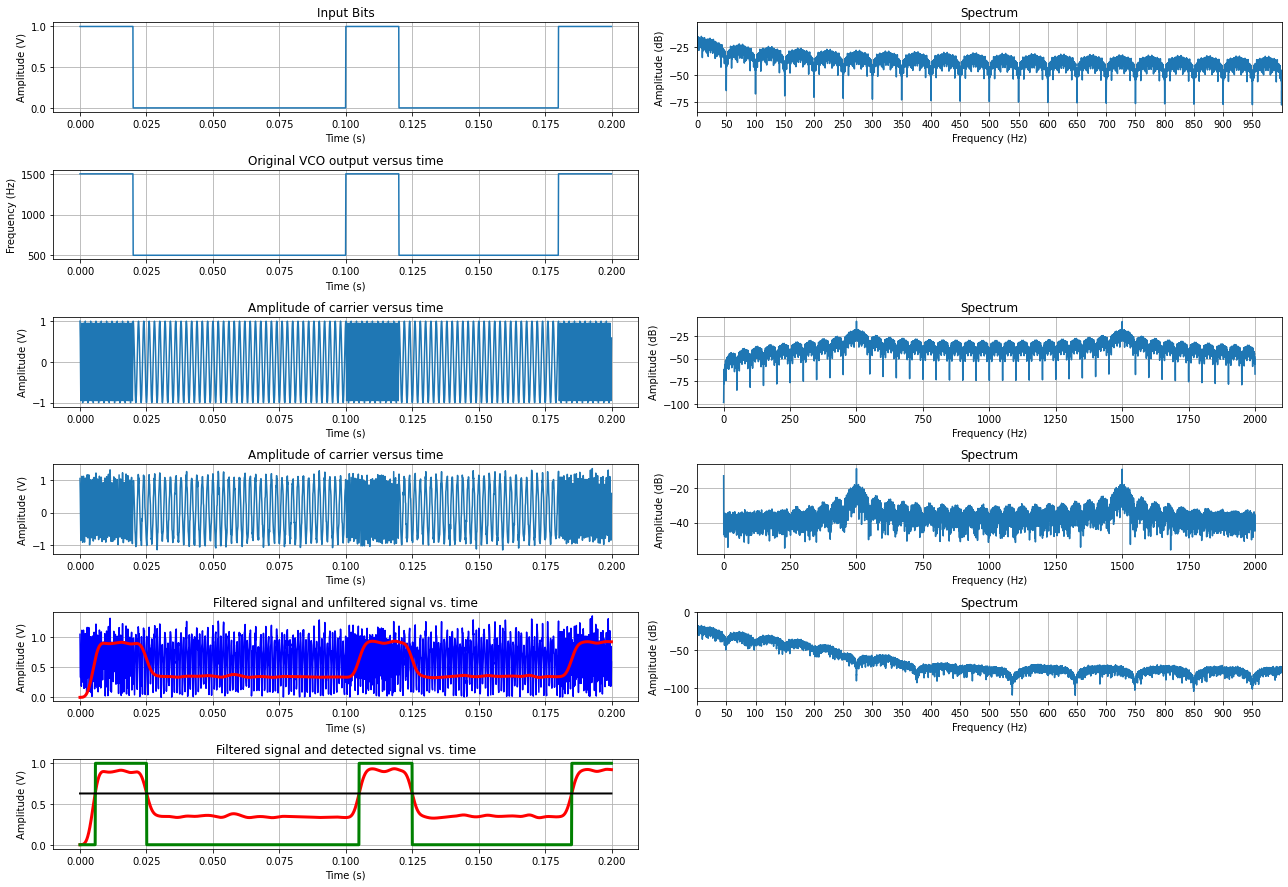

In [300]:
import numpy as np
import pylab as pl
import scipy.signal.signaltools as sigtool
import scipy.signal as signal
from numpy.random import sample

#the following variables setup the system
Fc = 1000       #simulate a carrier frequency of 1kHz
Fbit = 50       #simulated bitrate of data
Fdev = 500      #frequency deviation, make higher than bitrate
N = 640         #how many bits to send
A = 1           #transmitted signal amplitude
Fs = 10000      #sampling frequency for the simulator, must be higher than twice the carrier frequency
A_n = 0.10      #noise peak amplitude
N_prntbits = 10 #number of bits to print in plots

#Bit period
Tb=1/Fbit
'''
# Compute Amplitude of Noise
snr = 10**(SNR/10.0)  # linear SNR
No = 1.0/snr
A_n=np.sqrt(No/2)
print("Amplitude of Noise = %f" % A_n)
'''

#generate some random data for testing
data_in = np.random.randint(0,2,N)

# use VCO to generate FSK
t = np.arange(0,float(N)/float(Fbit),1/float(Fs), dtype=np.float)
#extend the data_in to account for the bitrate and convert 0/1 to frequency
m = np.zeros(0).astype(float)
data = np.zeros(0).astype(float)
for bit in data_in:
    if bit == 0:
        m=np.hstack((m,np.multiply(np.ones(int(Fs/Fbit)),Fc+Fdev)))
        data=np.hstack((data,np.multiply(np.ones(int(Fs/Fbit)),1)))
    else:
        m=np.hstack((m,np.multiply(np.ones(int(Fs/Fbit)),Fc-Fdev)))
        data=np.hstack((data,np.multiply(np.ones(int(Fs/Fbit)),0)))
y=np.zeros(0)
y=A * np.cos(2*np.pi*np.multiply(m,t))

### view the input and FSK signal in time and frequency domain
N_FFT = float(len(data))
f = np.arange(0,Fs/2,Fs/N_FFT)
w = np.hanning(len(data))
y_f = np.fft.fft(np.multiply(data,w))
y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))

plt.figure(figsize=(18,12))
pl.subplot(6,2,1)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],data[0:int(Fs*N_prntbits/Fbit)])
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Input Bits')
pl.grid(True)

pl.subplot(6,2,2)
pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.xlim([0.0, int(20/Tb)])
plt.xticks(np.arange(0,int(20/Tb),int(1/Tb)))
pl.tight_layout()


pl.subplot(6,2,3)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],m[0:int(Fs*N_prntbits/Fbit)])
pl.xlabel('Time (s)')
pl.ylabel('Frequency (Hz)')
pl.title('Original VCO output versus time')
pl.grid(True)

N_FFT = float(len(y))
f = np.arange(0,Fs/2,Fs/N_FFT)
w = np.hanning(len(y))
y_f = np.fft.fft(np.multiply(y,w))
y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))

pl.subplot(6,2,5)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y[0:int(Fs*N_prntbits/Fbit)])
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Amplitude of carrier versus time')
pl.grid(True)

pl.subplot(6,2,6)
pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.tight_layout()


#create  and add some noise to FSK
noise = (np.random.randn(len(y))+1)*A_n
snr = 10*np.log10(np.mean(np.square(y)) / np.mean(np.square(noise)))
print("SNR = %fdB" % snr)
y=np.add(y,noise)

#view the signal after adding noise to FSK in time and frequency domain
N_FFT = float(len(y))
f = np.arange(0,Fs/2,Fs/N_FFT)
w = np.hanning(len(y))
y_f = np.fft.fft(np.multiply(y,w))
y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))

pl.subplot(6,2,7)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y[0:int(Fs*N_prntbits/Fbit)])
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Amplitude of carrier versus time')
pl.grid(True)

pl.subplot(6,2,8)
pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.tight_layout()


#FSK Demodulation (Differentiator)
y_diff = np.diff(y,1)

#FSK Demodulation (Envelope detector + low-pass filter)
y_env = np.abs(sigtool.hilbert(y_diff))
h=signal.firwin( numtaps=100, cutoff=Fbit*2, nyq=Fs/2)
y_filtered=signal.lfilter( h, 1.0, y_env)

#view the FSK demdoulated signal
N_FFT = float(len(y_filtered))
f = np.arange(0,Fs/2,Fs/N_FFT)
w = np.hanning(len(y_filtered))
y_f = np.fft.fft(np.multiply(y_filtered,w))
y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))

pl.subplot(6,2,9)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],np.abs(y[0:int(Fs*N_prntbits/Fbit)]),'b')
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y_filtered[0:int(Fs*N_prntbits/Fbit)],'r',linewidth=3.0)
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Filtered signal and unfiltered signal vs. time')
pl.grid(True)

pl.subplot(6,2,10)
pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.xlim([0.0, int(20/Tb)])
plt.xticks(np.arange(0,int(20/Tb),int(1/Tb)))
pl.tight_layout()

#FSK detector : calculate the mean of the signal
mean = np.mean(y_filtered)

y_detected=(y_filtered>mean)
pl.subplot(6,2,11)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y_filtered[0:int(Fs*N_prntbits/Fbit)],'r',linewidth=3.0)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y_detected[0:int(Fs*N_prntbits/Fbit)],'g',linewidth=3.0)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],mean*np.ones(int(Fs*N_prntbits/Fbit)),'k',linewidth=2.0)
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Filtered signal and detected signal vs. time')
pl.grid(True)


#if the mean of the bit period is higher than the mean, the data is a 0
rx_data = []
sampled_signal = y_filtered[int(Fs/Fbit/2):len(y_filtered):int(Fs/Fbit)]
for bit in sampled_signal:
    if bit > mean:
        rx_data.append(0)
    else:
        rx_data.append(1)

# Compute Pe
bit_error=0
for i in range(0,len(data_in)):
    if rx_data[i] != data_in[i]:
        bit_error+=1

print ("bit period = %6.4f" % Tb)
print ("bit errors = %d" % bit_error)
print ("bits transmitted = %d" % N)
print ("bit error percent = %4.2f%%" % (float(bit_error)/float(N)*100))
pl.show()


#BPSK

SNR = 13.916424dB
bit period = 0.0200
bit errors = 0
bits transmitted = 64
bit error percent = 0.00%


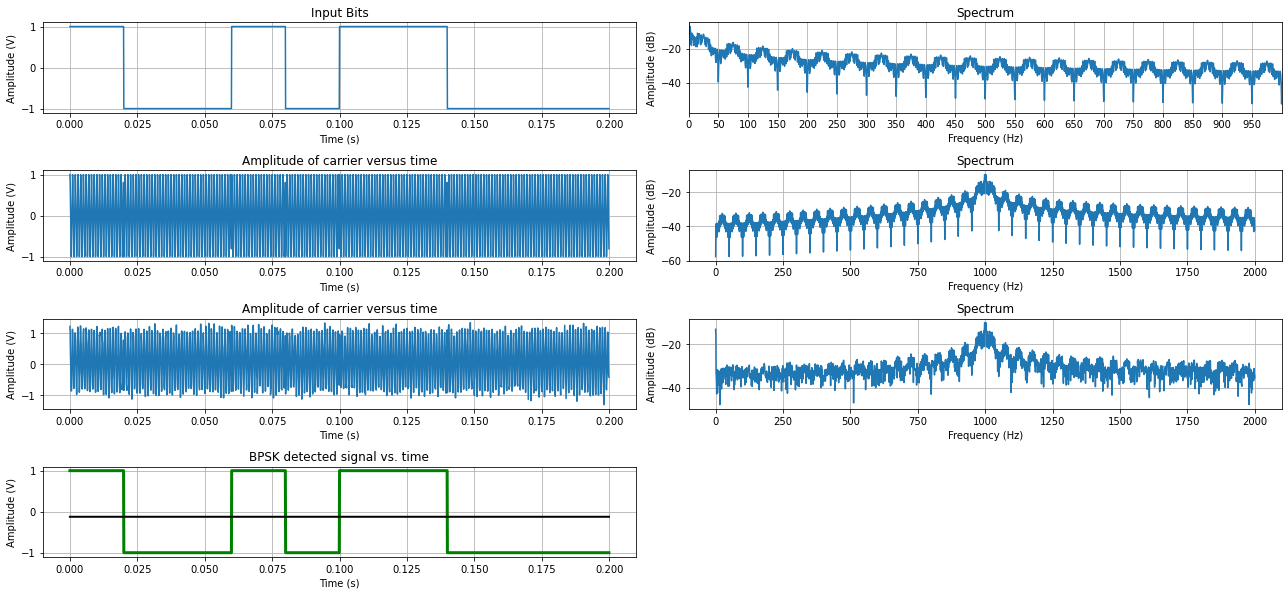

In [301]:
import numpy as np
import pylab as pl
import scipy.signal.signaltools as sigtool
import scipy.signal as signal
from numpy.random import sample
from scipy.integrate import simps


#the following variables setup the system
Fc = 1000       #simulate a carrier frequency of 1kHz
Fbit = 50       #simulated bitrate of data
Fdev = 500      #frequency deviation, make higher than bitrate
N = 64         #how many bits to send
A = 1           #transmitted signal amplitude
Fs = 10000      #sampling frequency for the simulator, must be higher than twice the carrier frequency
A_n = 0.10      #noise peak amplitude
N_prntbits = 10 #number of bits to print in plots

#Bit period
Tb=1/Fbit

'''
# Compute Amplitude of Noise
snr = 10**(SNR/10.0)  # linear SNR
No = 1.0/snr
A_n=np.sqrt(No/2)
print("Amplitude of Noise = %f" % A_n)
'''

#generate some random data for testing
data_in = np.random.randint(0,2,N)

# use VCO to generate BPSK
t = np.arange(0,float(N)/float(Fbit),1/float(Fs), dtype=np.float)
#extend the data_in to account for the bitrate and convert 0/1 to frequency
m = np.zeros(0).astype(float)
data = np.zeros(0).astype(float)
for bit in data_in:
    if bit == 0:
        #m=np.hstack((m,np.multiply(np.ones(int(Fs/Fbit)),Fc)))
        data=np.hstack((data,np.multiply(np.ones(int(Fs/Fbit)),A)))
    else:
        #m=np.hstack((m,np.multiply(np.ones(int(Fs/Fbit)),-F)))
        data=np.hstack((data,np.multiply(np.ones(int(Fs/Fbit)),-A)))
y=np.zeros(0)
ycos=np.cos(2*np.pi*Fc*t)
y=A * np.multiply(ycos,data)

### view the input and BPSK signal in time and frequency domain
N_FFT = float(len(data))
f = np.arange(0,Fs/2,Fs/N_FFT)
w = np.hanning(len(data))
y_f = np.fft.fft(np.multiply(data,w))
y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))

plt.figure(figsize=(18,10))
pl.subplot(5,2,1)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],data[0:int(Fs*N_prntbits/Fbit)])
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Input Bits')
pl.grid(True)

pl.subplot(5,2,2)
pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.xlim([0.0, int(20/Tb)])
plt.xticks(np.arange(0,int(20/Tb),int(1/Tb)))
pl.tight_layout()

N_FFT = float(len(y))
f = np.arange(0,Fs/2,Fs/N_FFT)
w = np.hanning(len(y))
y_f = np.fft.fft(np.multiply(y,w))
y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))

pl.subplot(5,2,3)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y[0:int(Fs*N_prntbits/Fbit)])
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Amplitude of carrier versus time')
pl.grid(True)

pl.subplot(5,2,4)
pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.tight_layout()


#create  and add some noise to BPSK
noise = (np.random.randn(len(y))+1)*A_n
snr = 10*np.log10(np.mean(np.square(y)) / np.mean(np.square(noise)))
print("SNR = %fdB" % snr)
y=np.add(y,noise)

#view the signal after adding noise to BPSK in time and frequency domain
N_FFT = float(len(y))
f = np.arange(0,Fs/2,Fs/N_FFT)
w = np.hanning(len(y))
y_f = np.fft.fft(np.multiply(y,w))
y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))

pl.subplot(5,2,5)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y[0:int(Fs*N_prntbits/Fbit)])
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Amplitude of carrier versus time')
pl.grid(True)

pl.subplot(5,2,6)
pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.tight_layout()


#BPSK Demodulation (Envelope detector)
y=A*np.multiply(ycos,y)
y_I1=[]
for i in range(0,N):
  x=t[int(Fs*(i)/Fbit):int(Fs*(i+1)/Fbit)]
  y1=y[int(Fs*(i)/Fbit):int(Fs*(i+1)/Fbit)]
  I1 = simps(y1, x)
  y_I1.append(100*I1)

y_Integration = np.zeros(0).astype(float)
for bit in y_I1:
    y_Integration=np.hstack((y_Integration,np.multiply(np.ones(int(Fs/Fbit)),bit)))


mean = np.mean(y_Integration)
y_detected=A*(2*(y_Integration>mean)-1)


#view the BPSK demdoulated signal (after integrator)
pl.subplot(5,2,7)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y_detected[0:int(Fs*N_prntbits/Fbit)],'g',linewidth=3.0)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],mean*np.ones(int(Fs*N_prntbits/Fbit)),'k',linewidth=2.0)
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('BPSK detected signal vs. time')
pl.grid(True)

#if the mean of the bit period is higher than the mean, the data is a 0
rx_data = []
sampled_signal = y_detected[int(Fs/Fbit/2):len(y_detected):int(Fs/Fbit)]
for bit in sampled_signal:
    if bit > mean:
        rx_data.append(0)
    else:
        rx_data.append(1)

# Compute Pe
bit_error=0
for i in range(0,len(data_in)):
    if rx_data[i] != data_in[i]:
        bit_error+=1

print ("bit period = %6.4f" % Tb)
print ("bit errors = %d" % bit_error)
print ("bits transmitted = %d" % N)
print ("bit error percent = %4.2f%%" % (float(bit_error)/float(N)*100))
pl.show()


## SNR VS BER curves for BPSK

Eb_No_dB=0.00, BER=8.4906e-02, Pe=7.8650e-02
Eb_No_dB=1.00, BER=5.3461e-02, Pe=5.6282e-02
Eb_No_dB=2.00, BER=4.0495e-02, Pe=3.7506e-02
Eb_No_dB=3.00, BER=2.3336e-02, Pe=2.2878e-02
Eb_No_dB=4.00, BER=1.5250e-02, Pe=1.2501e-02
Eb_No_dB=5.00, BER=5.7752e-03, Pe=5.9539e-03
Eb_No_dB=6.00, BER=2.1733e-03, Pe=2.3883e-03
Eb_No_dB=7.00, BER=6.4132e-04, Pe=7.7267e-04
Eb_No_dB=8.00, BER=1.5845e-04, Pe=1.9091e-04
Eb_No_dB=9.00, BER=3.5309e-05, Pe=3.3627e-05


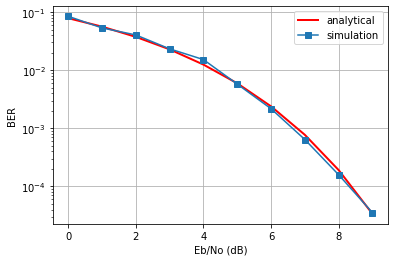

In [306]:
from numpy import *
from scipy.special import erfc
import matplotlib.pyplot as plt

SNR_MIN     = 0
SNR_MAX     = 9
Eb_No_dB    = arange(SNR_MIN,SNR_MAX+1)
SNR         = 10**(Eb_No_dB/10.0)  # linear SNR

Pe          = empty(shape(SNR))
BER         = empty(shape(SNR))

loop = 0
for snr in SNR:      # SNR loop
 Pe[loop] = 0.5*erfc(sqrt(snr))
 VEC_SIZE = int(ceil(100/Pe[loop]))  # vector length is a function of Pe

 # signal vector, new vector for each SNR value
 s = 2*random.randint(0,high=2,size=int(VEC_SIZE))-1

 # linear power of the noise; average signal power = 1
 No = 1.0/snr

 # noise
 n = sqrt(No/2)*random.randn(VEC_SIZE)

 # signal + noise
 x = s + n

 # decode received signal + noise
 y = sign(x)

 # find erroneous symbols
 err = where(y != s)
 error_sum = float(len(err[0]))
 BER[loop] = error_sum/VEC_SIZE
 print('Eb_No_dB=%4.2f, BER=%10.4e, Pe=%10.4e' % \
        (Eb_No_dB[loop], BER[loop], Pe[loop]))
 loop += 1

#plt.semilogy(Eb_No_dB, Pe,'r',Eb_No_dB, BER,'s')
plt.semilogy(Eb_No_dB, Pe,'r',linewidth=2)
plt.semilogy(Eb_No_dB, BER,'-s')
plt.grid(True)
plt.legend(('analytical','simulation'))
plt.xlabel('Eb/No (dB)')
plt.ylabel('BER')
plt.show()